In [36]:
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Import modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold


# Import PySwarms
import pyswarms as ps

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
test =pd.read_csv("test.csv")
train =pd.read_csv("train.csv")
gender=pd.read_csv("gender_submission.csv")

In [38]:
train['SibSp'] = train['SibSp'] + 1
train['Parch'] = train['Parch'] + 1
print(train.describe(include="all"))

        PassengerId    Survived      Pclass                Name   Sex  \
count    891.000000  891.000000  891.000000                 891   891   
unique          NaN         NaN         NaN                 891     2   
top             NaN         NaN         NaN  Denkoff, Mr. Mitto  male   
freq            NaN         NaN         NaN                   1   577   
mean     446.000000    0.383838    2.308642                 NaN   NaN   
std      257.353842    0.486592    0.836071                 NaN   NaN   
min        1.000000    0.000000    1.000000                 NaN   NaN   
25%      223.500000    0.000000    2.000000                 NaN   NaN   
50%      446.000000    0.000000    3.000000                 NaN   NaN   
75%      668.500000    1.000000    3.000000                 NaN   NaN   
max      891.000000    1.000000    3.000000                 NaN   NaN   

               Age       SibSp       Parch    Ticket        Fare    Cabin  \
count   714.000000  891.000000  891.000000    

In [39]:
print (train.head())
print (train.dtypes)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      2   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      2   
2                             Heikkinen, Miss. Laina  female  26.0      1   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      2   
4                           Allen, Mr. William Henry    male  35.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      1         A/5 21171   7.2500   NaN        S  
1      1          PC 17599  71.2833   C85        C  
2      1  STON/O2. 3101282   7.9250   NaN        S  
3      1            113803  53.1000  C123        S  
4      1            373450   8.0500   NaN        S  
Pa

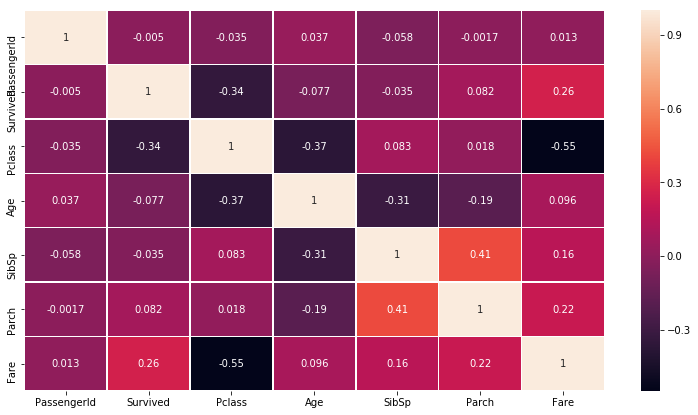

In [40]:
plt.figure(figsize=(13,7))
# sns.heatmap(train.corr())
sns.heatmap(train.corr(), annot=True ,linewidths=.5)

In [41]:
train[:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,2,1,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,2,1,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,1,1,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,2,1,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,1,1,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,1,1,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,1,1,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,4,2,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,1,3,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,2,1,237736,30.0708,NaN,C


In [42]:
nan_columns = train.columns[pd.isnull(train).any()].tolist()
print("Columns containing NaN values in train: "+str(nan_columns))

nan_Columns = test.columns[pd.isnull(test).any()].tolist()
print("Columns containing NaN values in test: "+str(nan_Columns))
test_one = test

Columns containing NaN values in train: ['Age', 'Cabin', 'Embarked']
Columns containing NaN values in test: ['Age', 'Fare', 'Cabin']


In [43]:
print(train["Survived"][train["Sex"]=='male'].value_counts(normalize=True))

print(train["Survived"].value_counts(normalize=True))
train["Embarked"][train["Embarked"] == "S"] = 0
train["Embarked"][train["Embarked"] == "C"] = 1
train["Embarked"][train["Embarked"] == "Q"] = 2

test["Embarked"][test["Embarked"] == "S"] = 0
test["Embarked"][test["Embarked"] == "C"] = 1
test["Embarked"][test["Embarked"] == "Q"] = 2

print(train["Embarked"].value_counts(normalize=True))
print(train["Survived"][train["Pclass"]==1].value_counts(normalize=True))
train[:5]


0    0.811092
1    0.188908
Name: Survived, dtype: float64
0    0.616162
1    0.383838
Name: Survived, dtype: float64
0    0.724409
1    0.188976
2    0.086614
Name: Embarked, dtype: float64
1    0.62963
0    0.37037
Name: Survived, dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,2,1,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,2,1,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,1,1,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,2,1,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,1,1,373450,8.0500,NaN,0


In [44]:
def impute(df):

# Convert the male and female groups to integer form
#     df["Sex"][df["Sex"] == "male"] = 0
#     df["Sex"][df["Sex"] == "female"] = 1
    df['Sex'] = df['Sex'].map({'male':2,'female':1})
    
# Family size
    df["family_size"] = df["SibSp"] + df["Parch"] +1

# Impute the Embarked variable
#     df["Embarked"] = df["Embarked"].fillna("S")
    df["Embarked"][df["Embarked"] == "S"] = 1
    df["Embarked"][df["Embarked"] == "C"] = 2
    df["Embarked"][df["Embarked"] == "Q"] = 3
    df['Embarked'].fillna(df['Embarked'].mode(), inplace=True)
    
    
    df["Fare"] = df["Fare"].fillna(df["Fare"].median())
    df["Age"] = df["Age"].fillna(df["Age"].mean())
    
    df["Child"] = float('NaN')

    df["Child"][df["Age"]<7] = 0
    df['Child'][(df['Age'] >= 7) & (df['Age'] <18)]=1
    df['Child'][(df['Age'] >= 18) & (df['Age'] <34)]=2
    df["Child"][df["Age"]>=34] = 3
    
    
    #Designation
    df ["Desig"]=df["Name"].str.lower()
    
    df["Desig"][df["Desig"].str.contains("dr.")==True]=0
    df['Desig'][df['Desig'].str.contains("mr.")==True]=1
    df['Desig'][df['Desig'].str.contains("mrs.")==True]=2
    df['Desig'][df['Desig'].str.contains("mme.")==True]=2
    df['Desig'][df['Desig'].str.contains("mlle.")==True]=2
    df['Desig'][df['Desig'].str.contains("ms.")==True]=2
    df['Desig'][df['Desig'].str.contains("master.")==True]=1
    df['Desig'][df['Desig'].str.contains("miss.")==True]=2
    df['Desig'][df['Desig'].str.contains("capt.")==True]=3
    df['Desig'][df['Desig'].str.contains("rev.")==True]=4
    df['Desig'][df['Desig'].str.contains("major.")==True]=5
    df['Desig'][df['Desig'].str.contains("col.")==True]=6
    df['Desig'][df['Desig'].str.contains("countess")==True]=7
    df['Desig'][df['Desig'].str.contains("jonkheer")==True]=7
    df['Desig'][df['Desig'].str.contains("don.")==True]=7
    
    df['Desig'] = df['Desig'].map({0:8,1:1,2:2,3:3,4:4,5:5,6:6,7:7})
    print(df['Desig'].value_counts())

    #Cabin
    df=df.drop(['Cabin'],axis=1)
    
    #Name
    df=df.drop(['Name'],axis=1)
    
    #Ticket
    df=df.drop(['Ticket'],axis=1)
    
#     df ["Cabin_room"]=df["Cabin"].astype(str).str[0]
#     df ["Cabin_room"][df["Cabin_room"] == "A"] = 0
#     df ["Cabin_room"][df["Cabin_room"] == "B"] = 1
#     df ["Cabin_room"][df["Cabin_room"] == "C"] = 2
#     df ["Cabin_room"][df["Cabin_room"] == "D"] = 3
#     df ["Cabin_room"][df["Cabin_room"] == "E"] = 4
#     df ["Cabin_room"][df["Cabin_room"] == "F"] = 5
#     df ["Cabin_room"][df["Cabin_room"] == "G"] = 6
#     df ["Cabin_room"][df["Cabin_room"] == "T"] = 7
#     df ["Cabin_room"][df["Cabin_room"] == "n"] = 30
    
    #Fare per person
    df["FPP"] = float('NaN')
    df["FPP"] = df["Fare"]/df["family_size"]

#     df = df.dropna()
    
    return df

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      2   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      2   
2                             Heikkinen, Miss. Laina  female  26.0      1   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      2   
4                           Allen, Mr. William Henry    male  35.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      1         A/5 21171   7.2500   NaN        0  
1      1          PC 17599  71.2833   C85        1  
2      1  STON/O2. 3101282   7.9250   NaN        0  
3      1            113803  53.1000  C123        0  
4      1            373450   8.0500   NaN        0  
1 

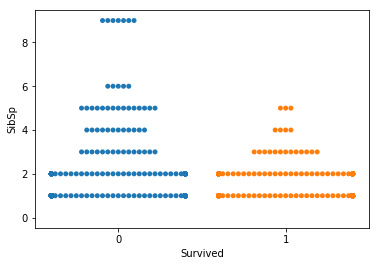

In [45]:
print(train[:5])
target = train['Survived']
# tes_target = train['Survived']

train_two = train.copy()
train_two["family_size"] = train_two["SibSp"] + train_two["Parch"] +1
train_two=impute(train_two)
test_two = test.copy()
test_two=impute(test_two)


# Create a new feature set and add the new feature
features_three = train_two[["Pclass","Child","Sex" ,"SibSp", "family_size","Desig","FPP"]].values

# Define the tree classifier, then fit the model
my_tree_three = tree.DecisionTreeClassifier(max_depth = 10, min_samples_split =5, random_state = 1)
my_tree_three = my_tree_three.fit(features_three,target)

# Print the score of this decision tree
print(my_tree_three.score(features_three, target))

test_features = test_two[["Pclass", "Child", "Sex","SibSp", "family_size","Desig","FPP"]].values
pred_forest = my_tree_three.predict(test_features)


PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(pred_forest, PassengerId, columns = ["Survived"])
# print(my_solution)

# Check that your data frame has 418 entries
print(my_solution.shape)

# Write your solution to a csv file with the name my_solution.csv
my_solution.to_csv("my_solution_one.csv", index_label = ["PassengerId"])

plt.scatter(train_two["family_size"],train_two["Survived"])
sns.swarmplot(y="SibSp", x="Survived", data=train_two)#,hue='smoker');

# plt.scatter(train_two["family_size"],train_two["Survived"])
# sns.swarmplot(y="SibSp", x="Survived", data=train_two)#,hue='smoker');

0    0.575758
1    0.424242
Name: Survived, dtype: float64
1    0.702128
0    0.297872
Name: Survived, dtype: float64


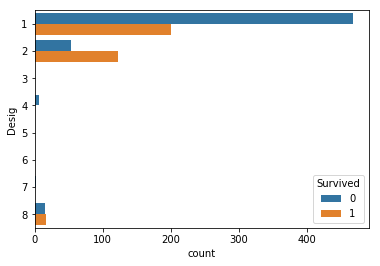

In [46]:
# Print normalized Survival Rates for passengers under 18
print(train_two["Survived"][train_two["Child"] == 1].value_counts(normalize = True))

# Print normalized Survival Rates for passengers 18 or older
print(train_two["Survived"][train_two["Child"] == 0].value_counts(normalize = True))

sns.countplot(hue="Survived", y="Desig",data=train_two)

# print (train[:10])

In [47]:
train_two=train_two.drop([61, 829])
print(train_two.info())
# print(pd.DataFrame(train_two).isnull().any())
print(train_two['Survived'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null float64
family_size    889 non-null int64
Child          889 non-null float64
Desig          889 non-null int64
FPP            889 non-null float64
dtypes: float64(5), int64(8)
memory usage: 97.2 KB
None
0    549
1    340
Name: Survived, dtype: int64


Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, family_size, Child, Desig, FPP]
Index: []
               0           1           2           3           4           5   \
count  889.000000  889.000000  889.000000  889.000000  889.000000  889.000000   
mean   446.000000    2.311586    1.649044   29.653446    1.524184    1.382452   
std    256.998173    0.834700    0.477538   12.968366    1.103705    0.806761   
min      1.000000    1.000000    1.000000    0.420000    1.000000    1.000000   
25%    224.000000    2.000000    1.000000   22.000000    1.000000    1.000000   
50%    446.000000    3.000000    2.000000   29.699118    1.000000    1.000000   
75%    668.000000    3.000000    2.000000   35.000000    2.000000    1.000000   
max    891.000000    3.000000    2.000000   80.000000    9.000000    7.000000   

               6           7           8           9           10          11  
count  889.000000  889.000000  889.000000  889.0000

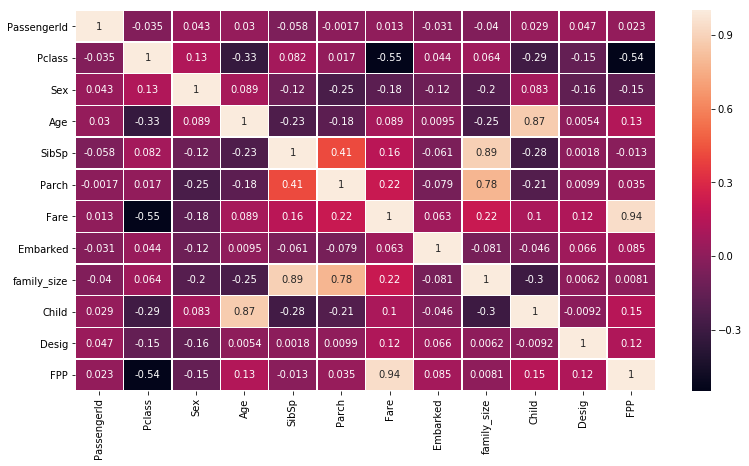

In [48]:
# Import the `RandomForestClassifier`
from sklearn.ensemble import RandomForestClassifier

print(train_two[train_two['Embarked'].isnull()])

target = train_two["Survived"].values
train_two=train_two.drop(['Survived'], axis=1)
# We want the Pclass, Age, Sex, Fare,SibSp, Parch, and Embarked variables
# features_forest = train_two[["Pclass","Cabin_room","Desig", "Embarked","family_size","Child","Desig","FPP","Parch"]].values
# features_forest = train_two[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch", "Embarked","family_size","FPP","Desig"]].values
feature_forest = train_two.values
print(pd.DataFrame(feature_forest).describe())


# Building and fitting my_forest
forest = RandomForestClassifier(max_depth = 10, min_samples_split=3, n_estimators = 1500, random_state = 1)
print(pd.DataFrame(feature_forest).isnull().any())
my_forest = forest.fit(feature_forest,target)

# Print the score of the fitted random forest
print("Score is " + str(my_forest.score(feature_forest, target)))

# Feature Importances
print(forest.feature_importances_)

plt.figure(figsize=(13,7))
# sns.heatmap(train.corr())
sns.heatmap(train_two.corr(), annot=True ,linewidths=.5)

# Compute predictions on our test set features then print the length of the prediction vector
test_features = test_two#[["Pclass", "Age", "Sex", "Fare", "SibSp", "Parch","Embarked","family_size","FPP","Desig"]].values
pred_forest = my_forest.predict(test_features)

In [50]:
# Submission

# Make your prediction using the test set
print(pred_forest)

# Create a data frame with two columns: PassengerId & Survived. Survived contains your predictions
PassengerId =np.array(test["PassengerId"]).astype(int)
my_solution = pd.DataFrame(pred_forest, PassengerId, columns = ["Survived"])
# print(my_solution)

# Check that your data frame has 418 entries
print(my_solution.shape)

# Write your solution to a csv file with the name my_solution.csv
my_solution.to_csv("my_solution_one.csv", index_label = ["PassengerId"])

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 1 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0
 0 1 1 1 1 1 0 1 0 0 0]
(418, 1)
